#### Kaggle Titanic Challenge
Goal: Predict the survivor of the Titanic by implementing a supervised learning algorithm

##### 1. The imports

In [ ]:
import re
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import SVC
import numpy as np
from sklearn.model_selection import train_test_split


###### 2. Reading the training data

In [ ]:
passengers = pd.read_csv('passengers_dataset/train.csv')
passengers.head()

###### 3.  Data Preprocessing 

I select certain columns to build my feature vector 

In [22]:
passengers = passengers.loc[:, ['Survived', 'Age', 'SibSp', 'Parch', 'Ticket']]
# Sanity Check, observe the data filtered
passengers.head()

,Survived,Age,SibSp,Parch,Ticket
0,0,22.0,1,0,A/5 21171
1,1,38.0,1,0,PC 17599
2,1,26.0,0,0,STON/O2. 3101282
3,1,35.0,1,0,113803
4,0,35.0,0,0,373450


##### 5. Data distribution
Plotting using pandas plot method

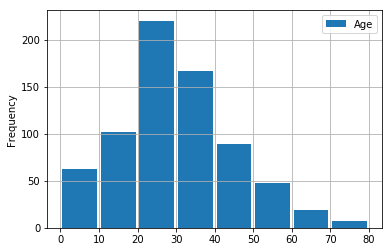

In [23]:

ages = passengers[['Age']].plot(kind='hist', bins= [0, 10, 20, 30, 40, 50, 60, 70, 80 ], rwidth=0.9, grid= True)
plt.show()

##### 5.1 Data distribution: Selecting Survivors and non-survivors separately
In here, the goal is to plot the feature vectors selected and see if the training data is linearly separable

In [24]:
survivor_list = passengers.loc[passengers['Survived']==1]
# sanity check
survivor_list.head()

,Survived,Age,SibSp,Parch,Ticket
1,1,38.0,1,0,PC 17599
2,1,26.0,0,0,STON/O2. 3101282
3,1,35.0,1,0,113803
8,1,27.0,0,2,347742
9,1,14.0,1,0,237736


In [25]:
dead_list = passengers.loc[passengers['Survived']==0]
dead_list.head()

,Survived,Age,SibSp,Parch,Ticket
0,0,22.0,1,0,A/5 21171
4,0,35.0,0,0,373450
5,0,NaN,0,0,330877
6,0,54.0,0,0,17463
7,0,2.0,3,1,349909


##### 5.2 Feature Vector Age vs Ticket
The method values returns a numpy array

In [26]:
dead_age = dead_list['Age'].values
dead_ticket = dead_list['Ticket'].values

survivor_age = survivor_list['Age'].values
survivor_ticket = survivor_list['Ticket'].values

##### 5.3 Plotting the feature vectors

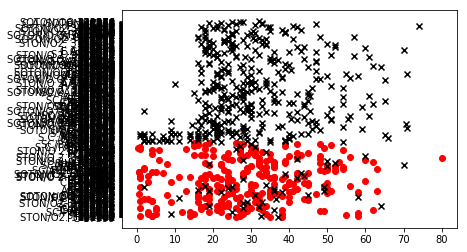

In [27]:
plt_survivor = plt.scatter(survivor_age, survivor_ticket, color = 'Red', marker = 'o')
plt_dead = plt.scatter(dead_age, dead_ticket, color = 'Black', marker='x')

##### 5.3 Cleaning the ticket data

In [28]:
def ticket_cleaner(ticket_data):
    data_cleaned = []
    for iterator in range(0, len(ticket_data)):
        ticket_cleaned = re.findall('\d+\d+', ticket_data[iterator])
        data_cleaned.extend(ticket_cleaned)
    diff = len(ticket_data)- len(data_cleaned)
    if diff !=0:
        for extensor in range(0, diff):
            data_cleaned.append(str(3))
    return data_cleaned

In [29]:
survivor_ticket_cleaned = ticket_cleaner(survivor_ticket)
dead_ticket_cleaned = ticket_cleaner(dead_ticket)

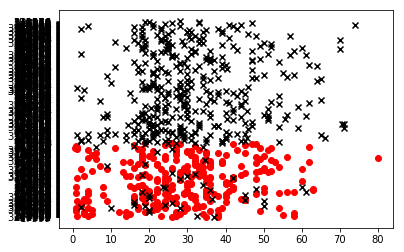

In [30]:
plt_survivor = plt.scatter(survivor_age, survivor_ticket_cleaned, color = 'Red', marker = 'o')
plt_dead = plt.scatter(dead_age, dead_ticket_cleaned, color = 'Black', marker='x')

##### 6. The SVM input features

In [32]:
# The class label selection
y = passengers.loc[:,'Survived']

# The features vector 
tr_ages = passengers.loc[:, 'Age']
tr_ages_values = passengers.loc[:, 'Age'].values # The values within the DF as numpy array
tr_ages = tr_ages.fillna(np.random.choice(tr_ages_values)) # remove the NaN WARNING- THIS CAN STILL PUT A NAN
tr_ages = tr_ages.values


ticket = passengers.loc[:, 'Ticket']
ticket_values = passengers.loc[:,'Ticket'].values
ticket = ticket.fillna(np.random.choice(ticket_values))
ticket_data = ticket.values
ticket = np.asarray(ticket_cleaner(ticket_data))

In [38]:
training_data = np.column_stack((tr_ages, ticket))
# sanity check
assert len(training_data)== len(y)
assert training_data.shape == (891,2)

##### 7. splitting the data

In [39]:
x_tr, x_tst, y_tr, y_tst = train_test_split(training_data, y, test_size= 0.3)

###### 8. The model

In [40]:
svm = SVC(kernel='rbf', gamma = 1, C = 1).fit(x_tr, y_tr)
print(svm.score(x_tst, y_tst))

0.6380597014925373
